# 텍스트 분석과 시각화

- 빈도를 바탕으로 한 그래프와 워드 클라우드(word cloud)
- 텍스트 분석은 문서를 구성하는 단어 파악이 핵심
- 예. 대통령 연설문에 사용된 단어들의 빈도 분석 -> 대통령이 중요시하는 것이 무엇인지 의도파악
  - https://cyram.tistory.com/309

## 1. 단어 빈도 그래프 : 가장 많이 쓰인 단어는?

- 토큰화, 어간 추출, 불용어 제거 등 텍스트 데이터 전처리 후 진행

#### 예제 데이터. 
- 영어소설 : 루이스캐럴의 '이상한 나라의 앨리스'
- 구텐베르크 프로젝트 : 저작권 만료 소설 ebook 제공
    - https://www.gutenberg.org

### 1) 데이터 로딩과 텍스트 전처리

In [1]:
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import gutenberg

In [2]:
file_names = gutenberg.fileids()
file_names

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

- 문서 다운로드 및 내용 확인

In [3]:
doc_alice = gutenberg.open('carroll-alice.txt').read()

In [4]:
print(doc_alice[:500])

[Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversation?'

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy an


- 토큰화

In [5]:
from nltk.tokenize import word_tokenize

tokens_alice = word_tokenize(doc_alice)
print(f'Number of tokens:',len(tokens_alice))
print(f'token sample:', tokens_alice[:20])

Number of tokens: 33494
token sample: ['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'was', 'beginning']


- 어간 추출

In [6]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
stem_tokens_alice = [stemmer.stem(token) for token in tokens_alice]
print(f'Number of tokens:',len(stem_tokens_alice))
print(f'token sample:', stem_tokens_alice[:20])

Number of tokens: 33494
token sample: ['[', 'alic', "'s", 'adventur', 'in', 'wonderland', 'by', 'lewi', 'carrol', '1865', ']', 'chapter', 'i', '.', 'down', 'the', 'rabbit-hol', 'alic', 'wa', 'begin']


- 표제어 추출

In [7]:
from nltk.stem import WordNetLemmatizer

lemma = WordNetLemmatizer()
lem_tokens_alice = [lemma.lemmatize(token) for token in tokens_alice]
print(f'Number of tokens:',len(lem_tokens_alice))
print(f'token sample:', lem_tokens_alice[:20])

Number of tokens: 33494
token sample: ['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'wa', 'beginning']


- 정규표현식을 이용한 토큰화

In [8]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer("[\w']{3,}")
reg_tokens_alice = tokenizer.tokenize(doc_alice.lower())
print(f'Number of tokens:',len(reg_tokens_alice))
print(f'token sample:', reg_tokens_alice[:20])

Number of tokens: 21616
token sample: ["alice's", 'adventures', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'down', 'the', 'rabbit', 'hole', 'alice', 'was', 'beginning', 'get', 'very', 'tired', 'sitting', 'her', 'sister']


- 불용어 제거

In [9]:
from nltk.corpus import stopwords
eng_stops=set(stopwords.words('english'))

result_alice = [word for word in reg_tokens_alice if word not in eng_stops]

print(f'Number of tokens:',len(result_alice))
print(f'token sample:', result_alice[:20])

Number of tokens: 12999
token sample: ["alice's", 'adventures', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'rabbit', 'hole', 'alice', 'beginning', 'get', 'tired', 'sitting', 'sister', 'bank', 'nothing', 'twice', 'peeped', 'book']


- 단어별 빈도

In [10]:
from collections import Counter

alice_word_count = Counter(result_alice)
print(f'Number of tokens:',len(alice_word_count))
print(f'token sample:', alice_word_count.most_common(20))

Number of tokens: 2687
token sample: [('said', 462), ('alice', 385), ('little', 128), ('one', 98), ('know', 88), ('like', 85), ('went', 83), ('would', 78), ('could', 77), ('thought', 74), ('time', 71), ('queen', 68), ('see', 67), ('king', 61), ('began', 58), ('turtle', 57), ("'and", 56), ('way', 56), ('mock', 56), ('quite', 55)]


- 품사 태깅하여 명사, 동사, 형용사만 추출

In [11]:
from nltk import pos_tag
tag_set = ['NN','VB','VBD','JJ']
my_words = [word for word, tag in pos_tag(result_alice) if tag in tag_set]
print(f'Number of tokens:',len(Counter(my_words)))
print(f'token sample:', Counter(my_words).most_common(20))

Number of tokens: 1726
token sample: [('said', 462), ('alice', 293), ('little', 124), ('went', 83), ('time', 71), ('queen', 66), ('began', 58), ('way', 56), ('turtle', 56), ('mock', 55), ('thought', 54), ('thing', 49), ('voice', 48), ('head', 46), ('gryphon', 45), ('got', 44), ('rabbit', 42), ('looked', 42), ('see', 42), ('came', 40)]


### 2) 시각화 

In [12]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family = font_name)

#### 전체 단어별 빈도수 시각화

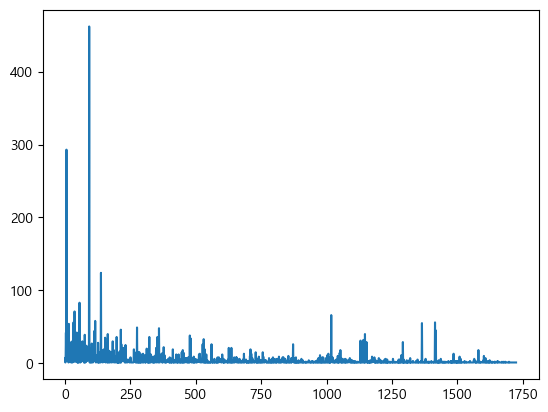

In [13]:
word_cnt_list = [Counter(my_words)[word] for word in Counter(my_words)]
plt.plot(word_cnt_list)
plt.show()

지프의 법칙(Zipf's law)
- 하버드대학교 언어학자 조지 킹슬리 지프가 제안
- 말뭉치의 단어들을 사용빈도가 높은 순서대로 나열하면 단어의 사용빈도는 순위에 반비례한다

#### 빈도수 막대그래프
- 사용 빈도가 높은 상위 20개 단어

In [14]:
cnt_series = pd.Series(Counter(my_words))
df = pd.DataFrame(cnt_series, columns=['freq'])
df

,freq
alice's,7
carroll,1
chapter,11
rabbit,42
hole,5
...,...
loving,1
childhood,1
gather,1
wonderland,1


In [15]:
df_sort = df.sort_values('freq', ascending=False)
df_sort

,freq
said,462
alice,293
little,124
went,83
time,71
...,...
'one,1
steady,1
'some,1
altered,1


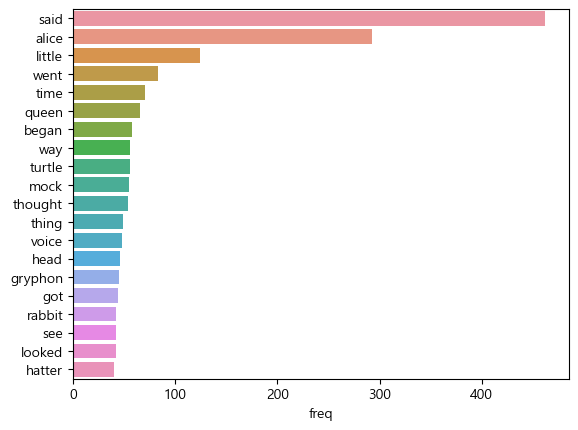

In [16]:
df20 = df_sort.iloc[:20]
sns.barplot(df20,x='freq',y=df20.index)
plt.show()

#### 워드 클라우드(word cloud)

- 텍스트 분석 결과를 보여주는 시각화 도구
- 빈도가 높은 단어는 크게, 낮은 단어는 작게 표시
- 단어 빈도 분포를 한 눈에 파악할 수 있음

워드 클라우드 설치

In [17]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [18]:
import wordcloud
wordcloud.__version__

'1.9.3'

워드 클라우드 이미지 생성 후 plt.imshow()를 이용하여 이미지 출력

In [19]:
from wordcloud import WordCloud

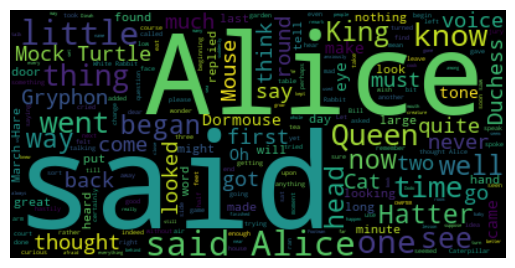

In [20]:
wordcloud = WordCloud().generate(doc_alice) # 이미지

plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [21]:
wordcloud.to_array().shape

(200, 400, 3)

wordcloud 폰트 크기 조절 : max_font_size
- 빈도수가 높은 단어와 낮은 단어의 폰트 크기 차이 조절
- 폰트 최대 크기 제한

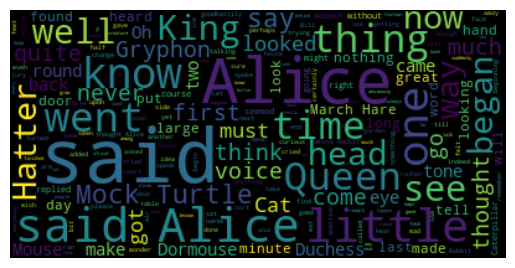

In [22]:
wordcloud = WordCloud(max_font_size=60).generate(doc_alice)

plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

토큰화, 불용어 제거, 품사 태깅 등의 작업 결과 활용한 워드클라우드
- generate_from_frequencies() 메서드

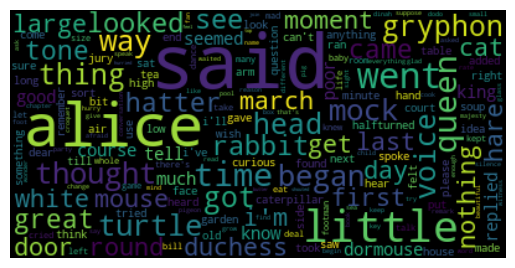

In [23]:
wordcloud = WordCloud(max_font_size=60).generate_from_frequencies(Counter(my_words))

plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

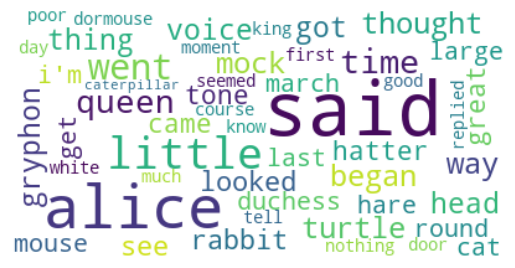

In [24]:
wordcloud = WordCloud(max_font_size=60,
                     background_color='white',
                     max_words=50).generate_from_frequencies(Counter(my_words))

plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

이미지 위에 워드 클라우드 출력
- mask 매개변수 사용

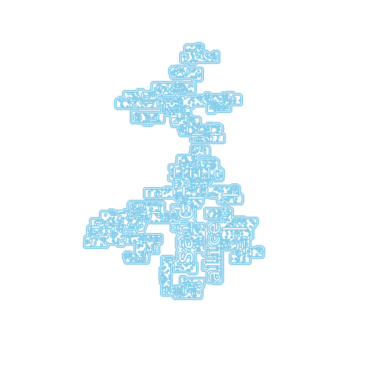

In [25]:
from PIL import Image

alice_mask = np.array(Image.open('data/image/alice_mask.png'))

wordcloud = WordCloud(max_font_size=60,
                     background_color='white',
                     max_words=50,
                     mask= alice_mask,
                     contour_width=3,
                     contour_color='skyblue')
wordcloud.generate_from_frequencies(Counter(my_words))
wordcloud.to_file('data/image/alice_mask.png')

plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

## 2. 한국어 문서에 대한 시각화

### 예제 데이터

- KoNLPy에서 제공하는 헌법 텍스트
- https://konlpy.org/ko/latest/data/

### 1) 데이터 준비 및 전처리

#### 데이터 읽기

In [27]:
from konlpy.corpus import kolaw

In [33]:
const_doc = kolaw.open('constitution.txt').read()
print(f'#문서 길이:',len(const_doc))
print(const_doc[:600])

#문서 길이: 18884
대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.

       제1장 총강
  제1조 ① 대한민국은 민주공화국이다.
②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.
  제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.
②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.
  제3조 대한민


#### 형태소 분석

In [41]:
from konlpy.tag import Okt
okt = Okt()
tokens_const = okt.morphs(const_doc)
print(f'#토큰 길이:',len(tokens_const))
print(f'#토큰 100:\n',tokens_const[:100])

#토큰 길이: 8796
#토큰 100:
 ['대한민국', '헌법', '\n\n', '유구', '한', '역사', '와', '전통', '에', '빛나는', '우리', '대', '한', '국민', '은', '3', '·', '1', '운동', '으로', '건립', '된', '대한민국', '임시정부', '의', '법', '통과', '불의', '에', '항거', '한', '4', '·', '19', '민주', '이념', '을', '계승', '하고', ',', '조국', '의', '민주', '개혁', '과', '평화', '적', '통일', '의', '사명', '에', '입', '각하', '여', '정의', '·', '인도', '와', '동포', '애', '로써', '민족', '의', '단결', '을', '공고', '히', '하고', ',', '모든', '사회', '적', '폐습', '과', '불의', '를', '타파', '하며', ',', '자율', '과', '조화', '를', '바탕', '으로', '자유민주', '적', '기', '본', '질서', '를', '더욱', '확고히', '하여', '정치', '·', '경제', '·', '사회', '·']


- 명사만 추출

In [40]:
tokens_nouns = okt.nouns(const_doc)
print(f'#토큰 길이:',len(tokens_nouns))
print(f'#토큰 100:\n',tokens_nouns[:100])

#토큰 길이: 3882
#토큰 100:
 ['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시정부', '법', '통과', '불의', '항거', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일', '사명', '입', '각하', '정의', '인도', '동포', '애', '로써', '민족', '단결', '공고', '모든', '사회', '폐습', '불의', '타파', '자율', '조화', '바탕', '자유민주', '질서', '더욱', '정치', '경제', '사회', '문화', '모든', '영역', '각인', '기회', '능력', '최고', '도로', '발휘', '자유', '권리', '책임', '의무', '완수', '안', '국민', '생활', '향상', '기하', '밖', '항구', '세계', '평화', '인류', '공영', '이바지', '함', '우리', '우리', '자손', '안전', '자유', '행복', '확보', '것', '다짐', '제정', '차', '개정', '헌법', '이제', '국회', '의결', '국민투표', '개정', '제', '장', '강', '제', '대한민국', '민주공화국', '대한민국']


#### 한 글자 단어 제외

In [42]:
tokens_const = [word for word in tokens_nouns if len(word) > 1]
print(f'#토큰 길이:',len(tokens_const))
print(f'#토큰 100:\n',tokens_const[:100])        

#토큰 길이: 3013
#토큰 100:
 ['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시정부', '통과', '불의', '항거', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일', '사명', '각하', '정의', '인도', '동포', '로써', '민족', '단결', '공고', '모든', '사회', '폐습', '불의', '타파', '자율', '조화', '바탕', '자유민주', '질서', '더욱', '정치', '경제', '사회', '문화', '모든', '영역', '각인', '기회', '능력', '최고', '도로', '발휘', '자유', '권리', '책임', '의무', '완수', '국민', '생활', '향상', '기하', '항구', '세계', '평화', '인류', '공영', '이바지', '우리', '우리', '자손', '안전', '자유', '행복', '확보', '다짐', '제정', '개정', '헌법', '이제', '국회', '의결', '국민투표', '개정', '대한민국', '민주공화국', '대한민국', '주권', '국민', '모든', '권력', '국민', '대한민국', '국민', '요건', '법률', '국가', '법률', '재외국민']


In [44]:
tokens_pos = okt.pos(const_doc)
print(f'#토큰 길이:',len(tokens_pos))
print(f'#토큰 100:\n',tokens_pos[:100])

#토큰 길이: 8796
#토큰 100:
 [('대한민국', 'Noun'), ('헌법', 'Noun'), ('\n\n', 'Foreign'), ('유구', 'Noun'), ('한', 'Josa'), ('역사', 'Noun'), ('와', 'Josa'), ('전통', 'Noun'), ('에', 'Josa'), ('빛나는', 'Verb'), ('우리', 'Noun'), ('대', 'Modifier'), ('한', 'Modifier'), ('국민', 'Noun'), ('은', 'Josa'), ('3', 'Number'), ('·', 'Punctuation'), ('1', 'Number'), ('운동', 'Noun'), ('으로', 'Josa'), ('건립', 'Noun'), ('된', 'Verb'), ('대한민국', 'Noun'), ('임시정부', 'Noun'), ('의', 'Josa'), ('법', 'Noun'), ('통과', 'Noun'), ('불의', 'Noun'), ('에', 'Josa'), ('항거', 'Noun'), ('한', 'Josa'), ('4', 'Number'), ('·', 'Punctuation'), ('19', 'Number'), ('민주', 'Noun'), ('이념', 'Noun'), ('을', 'Josa'), ('계승', 'Noun'), ('하고', 'Josa'), (',', 'Punctuation'), ('조국', 'Noun'), ('의', 'Josa'), ('민주', 'Noun'), ('개혁', 'Noun'), ('과', 'Josa'), ('평화', 'Noun'), ('적', 'Suffix'), ('통일', 'Noun'), ('의', 'Josa'), ('사명', 'Noun'), ('에', 'Josa'), ('입', 'Noun'), ('각하', 'Noun'), ('여', 'Josa'), ('정의', 'Noun'), ('·', 'Punctuation'), ('인도', 'Noun'), ('와', 'Josa'), ('동포', 'Noun'), (

In [45]:
# Verb만 추출
tokens_pos_list = [token for token in tokens_pos if token[1] == 'Verb' ]
print(f'#토큰 길이:',len(tokens_pos_list))
print(f'#토큰 100:\n',tokens_pos_list[:100])

#토큰 길이: 779
#토큰 100:
 [('빛나는', 'Verb'), ('된', 'Verb'), ('하고', 'Verb'), ('하며', 'Verb'), ('하여', 'Verb'), ('하고', 'Verb'), ('하게', 'Verb'), ('하며', 'Verb'), ('따르는', 'Verb'), ('하게', 'Verb'), ('하여', 'Verb'), ('할', 'Verb'), ('하면서', 'Verb'), ('되고', 'Verb'), ('걸쳐', 'Verb'), ('된', 'Verb'), ('거쳐', 'Verb'), ('한다', 'Verb'), ('나온다', 'Verb'), ('되는', 'Verb'), ('한다', 'Verb'), ('하는', 'Verb'), ('할', 'Verb'), ('진다', 'Verb'), ('한다', 'Verb'), ('하며', 'Verb'), ('이를', 'Verb'), ('한다', 'Verb'), ('하며', 'Verb'), ('된다', 'Verb'), ('된', 'Verb'), ('된', 'Verb'), ('가진다', 'Verb'), ('하는', 'Verb'), ('된다', 'Verb'), ('진다', 'Verb'), ('하는', 'Verb'), ('된다', 'Verb'), ('된다', 'Verb'), ('적이어야', 'Verb'), ('하며', 'Verb'), ('하는데', 'Verb'), ('가져야', 'Verb'), ('한다', 'Verb'), ('하는', 'Verb'), ('받으며', 'Verb'), ('하는', 'Verb'), ('할', 'Verb'), ('될', 'Verb'), ('할', 'Verb'), ('된다', 'Verb'), ('하여야', 'Verb'), ('한다', 'Verb'), ('할', 'Verb'), ('가진다', 'Verb'), ('가지는', 'Verb'), ('이를', 'Verb'), ('할', 'Verb'), ('진다', 'Verb'), ('받지', 'Verb'), ('한다', 'Verb'),

### 3) 시각화

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

#### 빈도 그래프

In [68]:
const_cnt = Counter(tokens_const)
df_const_cnt = pd.DataFrame(pd.Series(const_cnt), columns=['freq'])
df_const_cnt_sorted = df_const_cnt.sort_values('freq',ascending=False)
df_const_cnt_sorted

,freq
법률,127
대통령,83
국가,73
국회,68
국민,61
...,...
차기,1
연한,1
복수정당제,1
사업,1


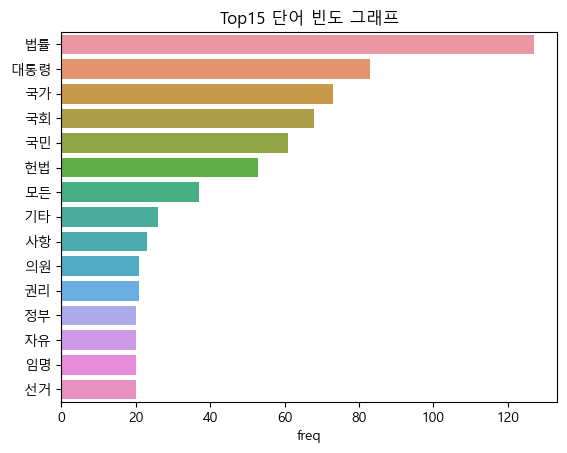

In [69]:
# 빈도가 높은 순으로 n개 단어에 대한 빈도 그래프 함수
def top_word_barplot(df_cnt, max_word=10):
    df = df_cnt.sort_values('freq',ascending=False).iloc[:max_word]
    sns.barplot(df, x='freq', y=df.index)
    plt.title(f'Top{max_word} 단어 빈도 그래프')
    plt.show()
top_word_barplot(df_const_cnt_sorted, 15)

#### 문제. 헌법 문서에서 동사만 추출하여 상위 20개 동사 빈도그래프 그리기

#pos토큰 길이: 8796
#pos토큰 10:
 [('대한민국', 'Noun'), ('헌법', 'Noun'), ('\n\n', 'Foreign'), ('유구', 'Noun'), ('한', 'Josa'), ('역사', 'Noun'), ('와', 'Josa'), ('전통', 'Noun'), ('에', 'Josa'), ('빛나는', 'Verb')]
#verb토큰 길이: 622
#verb토큰 10:
 ['빛나는', '하고', '하며', '하여', '하고', '하게', '하며', '따르는', '하게', '하여']


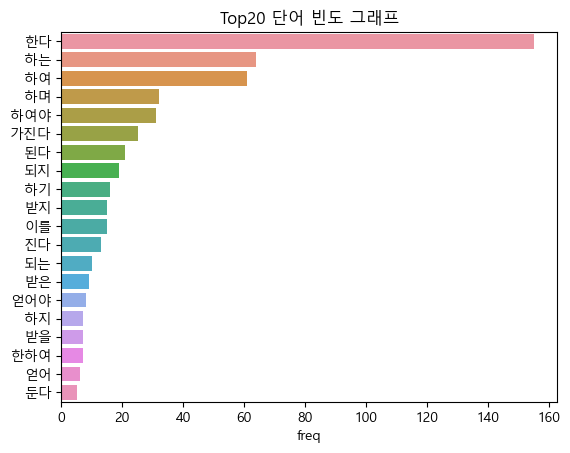

In [90]:
# 품사 구분 짓기
tokens_pos = okt.pos(const_doc)
print(f'#pos토큰 길이:',len(tokens_pos))
print(f'#pos토큰 10:\n',tokens_pos[:10])

# Verb만 추출
tokens_pos_list = [token[0] for token in tokens_pos if token[1] == 'Verb' ]
tokens_pos_list_2 = [token for token in tokens_pos_list if len(token)>1 ]
print(f'#verb토큰 길이:',len(tokens_pos_list_2))
print(f'#verb토큰 10:\n',tokens_pos_list_2[:10])

# 빈도수 계산
pos_cnt = Counter(tokens_pos_list_2)

# 빈도수 높은 순으로 정렬 후 데이터 프레임
df_pos_cnt = pd.DataFrame(pd.Series(pos_cnt), columns=['freq'])
df_pos_cnt_sorted = df_pos_cnt.sort_values('freq',ascending=False)

# 시각화
top_word_barplot(df_pos_cnt_sorted, 20)

In [104]:
def pick_tag_tokens(token_tag, tag_name='Noun', word_len=1):

    # 품사 구분 짓기
    tokens_pos = okt.pos(token_tag)

    # tag_name 추출
    tokens_pos_list = [token[0] for token in tokens_pos if token[1] == tag_name ]
    tokens_pos_list_2 = [token for token in tokens_pos_list if len(token)> word_len ]

    # 빈도수 계산
    pos_cnt = Counter(tokens_pos_list_2)

    # 빈도수 높은 순으로 정렬 후 데이터 프레임
    df_pos_cnt = pd.DataFrame(pd.Series(pos_cnt), columns=['freq'])
    df_pos_cnt_sorted = df_pos_cnt.sort_values('freq',ascending=False)
    return df_pos_cnt_sorted

       freq
대통령      83
국무총리     19
국회의원     18
대법원      17
공무원      17
...     ...
교육재정      1
교육제도      1
자율성       1
전문성       1
대법원판사     1

[145 rows x 1 columns]


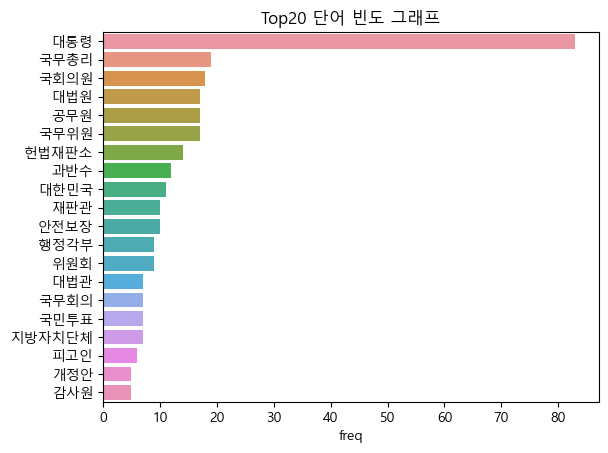

In [108]:
# 3글자 이상 명사만 추출하여 빈도 순으로 정렬
df = pick_tag_tokens(const_doc,tag_name='Noun',word_len=2)
print(df)

# 시각화
top_word_barplot(df,20)

#### 워드 클라우드

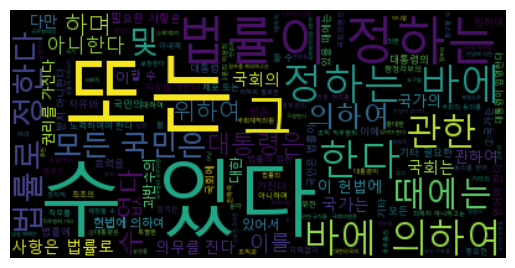

In [100]:
from wordcloud import WordCloud
font_path = 'C:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path=font_path).generate(const_doc)

plt.axis('off')
plt.imshow(wordcloud,interpolation='bilinear')
plt.show()

- 원 문서를 기반으로 한 워드클라우드

----